In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
UST2 = pd.read_csv('../UST2.csv')
print(UST2.head())
print(UST2.shape)

   Project ID  Opportunity Owner         Account Name             Stage  \
0            1    Amandeep Sidhu  Dana Companies, Llc   Signed Contract   
1            2    Amandeep Sidhu  Dana Companies, Llc  Verbal Agreement   
2            3    Amandeep Sidhu  Dana Companies, Llc  Verbal Agreement   
3            4    Amandeep Sidhu  Dana Companies, Llc  Verbal Agreement   
4            5        Anand Nair       Wellpoint, Inc   Signed Contract   

    Amount   Expected Revenue  Probability   Service Category  \
0    7680.0            7680.0            1                NaN   
1    6400.0            5760.0            1                NaN   
2    3600.0            3240.0            1                NaN   
3    3600.0            3240.0            1                NaN   
4   50224.0           50224.0            1  Mainframe Systems   

                Service Line  Stage Number   Account Type      Billing Type  \
0       Enterprise Solutions             8  US-Central BU  Time and Expense   


In [8]:
UST = pd.read_csv('../UST22.csv')
print(UST.head(10))
print(UST.shape)

   Project ID Opportunity Owner            Account Name  \
0           1    Amandeep Sidhu     Dana Companies, Llc   
1           2    Amandeep Sidhu     Dana Companies, Llc   
2           3    Amandeep Sidhu     Dana Companies, Llc   
3           4    Amandeep Sidhu     Dana Companies, Llc   
4           5        Anand Nair          Wellpoint, Inc   
5           6        Anand Nair          Wellpoint, Inc   
6           7        Anand Nair          Wellpoint, Inc   
7           8       Arun Satyan  OfficeMax Incorporated   
8           9      Brian Runyan           Sempra Energy   
9          10      Chris Bryson               Starbucks   

                              Stage     Amount   Expected Revenue  \
0                   Signed Contract      7680.0            7680.0   
1                  Verbal Agreement      6400.0            5760.0   
2                  Verbal Agreement      3600.0            3240.0   
3                  Verbal Agreement      3600.0            3240.0   
4    

In [9]:
# See the column data types and non-missing values
UST.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6891 entries, 0 to 6890
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Project ID            6891 non-null   int64  
 1   Opportunity Owner     6891 non-null   object 
 2   Account Name          6891 non-null   object 
 3   Stage                 6891 non-null   object 
 4    Amount               6891 non-null   float64
 5   Expected Revenue      6891 non-null   float64
 6   Probability           6891 non-null   int64  
 7   Service Category      6218 non-null   object 
 8   Service Line          6891 non-null   object 
 9   Stage Number          6891 non-null   int64  
 10  New Business          6891 non-null   int64  
 11  Account Type          6885 non-null   object 
 12  Billing Type          6889 non-null   object 
 13  MSA Signed            6891 non-null   int64  
 14  Unsolicited Proposal  6882 non-null   object 
 15  Deliverable Type     

In [10]:
UST.describe()

,Project ID,Amount,Expected Revenue,Probability,Stage Number,New Business,MSA Signed
count,6891.000000,6.891000e+03,6.891000e+03,6891.000000,6891.000000,6891.000000,6891.000000
mean,3468.259034,2.925607e+05,1.115754e+05,0.574953,4.145262,0.261065,0.192860
std,2003.099804,1.916039e+06,8.090385e+05,0.494386,4.652349,0.439247,0.394573
min,1.000000,-9.009600e+05,-9.009600e+05,0.000000,-3.000000,0.000000,0.000000
25%,1740.500000,6.306300e+03,0.000000e+00,0.000000,-1.000000,0.000000,0.000000
50%,3464.000000,4.252500e+04,7.500000e+03,1.000000,8.000000,0.000000,0.000000
75%,5186.500000,1.350100e+05,6.162568e+04,1.000000,8.000000,1.000000,0.000000
max,7132.000000,9.100000e+07,3.960000e+07,1.000000,8.000000,1.000000,1.000000


In [12]:
# Results mean there are outliers - ideally mean and median are approx equal
UST[' Amount '].mean(), UST[' Amount '].median()

(292560.71132056316, 42525.0)

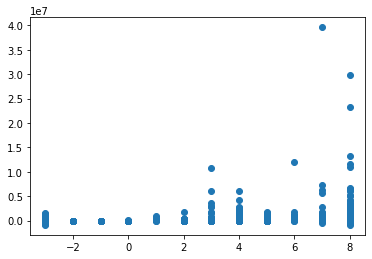

In [13]:
# Scatter plot to check the outliers
x=UST['Stage Number']
y=UST['Expected Revenue']
plt.scatter(x,y)

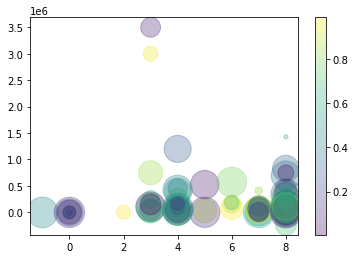

In [14]:
# Plot to see the distribtion of revenues vs stage number
# Using smaller subset
rng=np.random.RandomState(0)
x=UST2['Stage Number']
y=UST2['Expected Revenue']
colors=rng.rand(100)
sizes=1000*rng.rand(100)
plt.scatter(x,y,c=colors,s=sizes,alpha=.3)
plt.colorbar()

In [15]:
# Find all correlations and sort 
correlations_data = UST.corr()['Probability'].sort_values()

# Print the correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

New Business       -0.088450
Project ID         -0.064737
 Amount            -0.054859
MSA Signed          0.034142
Expected Revenue    0.102259
Stage Number        0.552487
Probability         1.000000
Name: Probability, dtype: float64 

New Business       -0.088450
Project ID         -0.064737
 Amount            -0.054859
MSA Signed          0.034142
Expected Revenue    0.102259
Stage Number        0.552487
Probability         1.000000
Name: Probability, dtype: float64


In [16]:
# Find all correlations and sort
correlations_data = UST2.corr()['Probability'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

 Amount            -0.275229
Expected Revenue   -0.141655
Project ID         -0.011839
MSA Signed          0.074318
Stage Number        0.807229
Probability         1.000000
Name: Probability, dtype: float64 



,Total,Percent
Service Category,673,9.766362
Unsolicited Proposal,9,0.130605
Account Type,6,0.087070
Deliverable Type,5,0.072558
Billing Type,2,0.029023


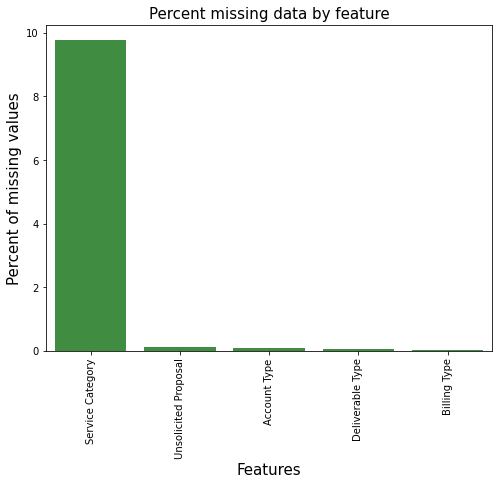

In [17]:
#Looking at the missing data

def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms
missingdata(UST)

In [ ]:
# Identified missing values feature

In [ ]:
# Drop service category (not useful), replace null values in other important columns

In [18]:
drop_column = ['Service Category']
UST.drop(drop_column, axis=1, inplace = True)

In [19]:
UST['Billing Type'].fillna(UST['Billing Type'].mode()[0], inplace = True)
UST['Deliverable Type'].fillna(UST['Deliverable Type'].mode()[0], inplace = True)
UST['Account Type'].fillna(UST['Account Type'].mode()[0], inplace = True)
UST['Unsolicited Proposal'].fillna(UST['Unsolicited Proposal'].mode()[0], inplace = True)
#UST['Expected Revenue'].fillna(UST['Expected Revenue'].median(), inplace = True)

In [20]:
# check if the missing data is cleaned
print('check the nan value in the UST data')
print(UST.isnull().sum())

check the nan value in the UST data
Project ID              0
Opportunity Owner       0
Account Name            0
Stage                   0
 Amount                 0
Expected Revenue        0
Probability             0
Service Line            0
Stage Number            0
New Business            0
Account Type            0
Billing Type            0
MSA Signed              0
Unsolicited Proposal    0
Deliverable Type        0
dtype: int64


In [21]:
UST.columns

Index(['Project ID', 'Opportunity Owner', 'Account Name', 'Stage', ' Amount ',
       'Expected Revenue', 'Probability', 'Service Line', 'Stage Number',
       'New Business', 'Account Type', 'Billing Type', 'MSA Signed',
       'Unsolicited Proposal', 'Deliverable Type'],
      dtype='object')

In [22]:
UST.shape

(6891, 15)

In [23]:
all_data = UST
import re
                                                                            
traindf=UST

traindf = pd.get_dummies(traindf, columns = ["Opportunity Owner","Account Name","Stage","Service Line","Stage Number","Account Type","Billing Type","Unsolicited Proposal","Deliverable Type"],
                             prefix=["Owner","Account","Stg","SvcLn","StgNum","Acctype","Billngtype","UnSolProp","DelType"])

In [24]:
traindf.head()

,Project ID,Amount,Expected Revenue,Probability,New Business,MSA Signed,Owner_Ajith Daniel,Owner_Alan Johnson,Owner_Amandeep Sidhu,Owner_Amit Mullerpattan,...,Billngtype_Internal,Billngtype_Per Seat,Billngtype_Per Transaction,Billngtype_T and E with Cap,Billngtype_Time and Expense,UnSolProp_No,UnSolProp_Yes,DelType_Managed Services / SLA Based,DelType_Scope of Work / Project,DelType_Staff Augmentation
0,1,7680.0,7680.0,1,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
1,2,6400.0,5760.0,1,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
2,3,3600.0,3240.0,1,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
3,4,3600.0,3240.0,1,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
4,5,50224.0,50224.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [25]:
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.model_selection import GridSearchCV # for Hyper parameter tuning
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn import metrics

In [26]:
all_features = traindf.drop("Probability",axis=1)
Targeted_feature = traindf["Probability"]

# total of 6891 records in dataset
# Divide the data set into two- 70% for train and 30% for test

#X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3)  
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42) 

# Check the train test data set shape
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4823, 498), (2068, 498), (4823,), (2068,))

# XG Boost

In [37]:
# put traindf into clean.csv - only needs to be run once
# traindf.to_csv('Datasets/clean.csv')

In [44]:
# https://xgboost.readthedocs.io/en/stable/python/python_intro.html#setting-parameters

import xgboost as xgb

# Read data
data = pd.read_csv('Datasets/clean.csv') # pd.DataFrame(np.arange(12).reshape((4,3)), columns=['a', 'b', 'c'])
label = data.columns # pd.DataFrame(np.random.randint(2, size=4))
dtrain = xgb.DMatrix(data, label=label)

# Set parameters
param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

# Training
num_round = 10
bst = xgb.train(param, dtrain, num_round, evallist)

# Save model
bst.save_model('0001.model')

# Load saved model
# bst = xgb.Booster({'nthread': 4})  # init model
# bst.load_model('model.bin')  # load data

# Prediction
# 7 entities, each contains 10 features
data = np.random.rand(7, 10)
dtest = xgb.DMatrix(data)
ypred = bst.predict(dtest)

# Graph 
xgb.plot_importance(bst)

ValueError: could not convert string to float: 'Unnamed: 0'

## Back to other model

In [29]:
# Train the logistic regression model with training data

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

--------------The Accuracy of the model----------------------------
Accuracy of logistic regression classifier on test set: 0.96


Text(0.5, 1.05, 'Confusion_matrix')

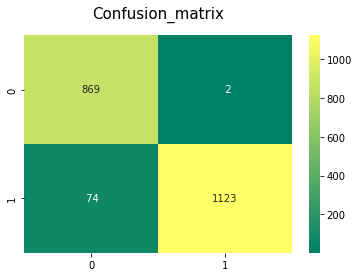

In [30]:
# predict the model output with test data 

y_pred = logreg.predict(X_test)

print('--------------The Accuracy of the model----------------------------')
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
rf_model.fit(X_train,y_train)
y_pred_rm=rf_model.predict(X_test)

print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Random Forest Classifier is', round(accuracy_score(y_pred_rm,y_test)*100,2))


--------------The Accuracy of the model----------------------------
The accuracy of the Random Forest Classifier is 99.56


In [32]:
print(metrics.classification_report(y_pred_rm,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       874
           1       0.99      1.00      1.00      1194

    accuracy                           1.00      2068
   macro avg       1.00      1.00      1.00      2068
weighted avg       1.00      1.00      1.00      2068



Text(83.40000000000006, 0.5, 'predicted label')

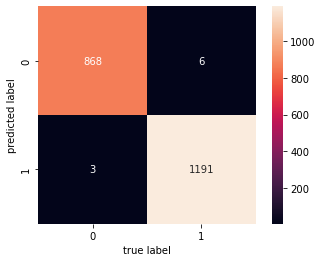

In [34]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,y_pred_rm)
sns.heatmap(mat.T,square=True,annot=True,fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')

In [35]:
print(y_pred_rm)

[0 0 1 ... 0 1 0]
